<a href="https://www.kaggle.com/code/somiaashraf/notebook20a8b468d0?scriptVersionId=176056371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing lib needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
#from keras.utils import to_categorical
#importing models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
import warnings
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

2024-05-06 18:02:08.330733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 18:02:08.330899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 18:02:08.514943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#loading Data
df1=pd.read_csv('/kaggle/input/ukaccidents/Accidents_2018.csv')
df2=pd.read_csv('/kaggle/input/ukaccidents/Casualties_2018.csv')
df3=pd.read_csv('/kaggle/input/ukaccidents/Vehicles_2018.csv')

/tmp/ipykernel_18/3705048503.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('/kaggle/input/ukaccidents/Accidents_2018.csv')
/tmp/ipykernel_18/3705048503.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('/kaggle/input/ukaccidents/Vehicles_2018.csv')


In [3]:
#check data shape
print('Accidents_2018 data shape is :' , df1.shape)
print('Casualties_2018 data shape is :' ,df2.shape)
print('Vehicles_2018 data shape is :' ,df3.shape)

Accidents_2018 data shape is : (122635, 32)
Casualties_2018 data shape is : (160597, 16)
Vehicles_2018 data shape is : (226409, 23)


In [4]:
#check data for df1
df1.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [5]:
#check data for df2
df2.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


In [6]:
#check data for df3
df3.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5


In [7]:
#merging all dataset together (merging df1 and df2)
dataFrame=pd.merge(df1,df2,on='Accident_Index')

In [8]:
#check data shape after merging 
dataFrame.shape

(140958, 47)

In [9]:
#check data 
dataFrame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010130027,523810.0,185730.0,-0.215455,51.556878,1,3,2,1,01/09/2018,...,6,3,0,0,0,0,0,3,1,6
1,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,6,3,0,0,0,2,0,11,1,3
2,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,1,3,0,0,0,2,0,11,1,3
3,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,0,0,0,9,1,4
4,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,2,0,0,9,1,4


In [10]:
#merge 3rd data frame with our data 
df=pd.merge(dataFrame,df3,on='Accident_Index')

In [11]:
#checking final data size 
df.shape

(270941, 69)

In [12]:
df.head(15)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,2,18,4,1499,1,-1,8,2,8
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,3,-1,-1,1999,1,16,-1,-1,-1
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,07/09/2018,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,27/09/2018,...,2,1,56,9,2967,2,1,1,1,1
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
5,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
6,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
7,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
8,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,1,18,4,125,1,3,3,1,3
9,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,2,21,5,1240,1,10,4,1,4


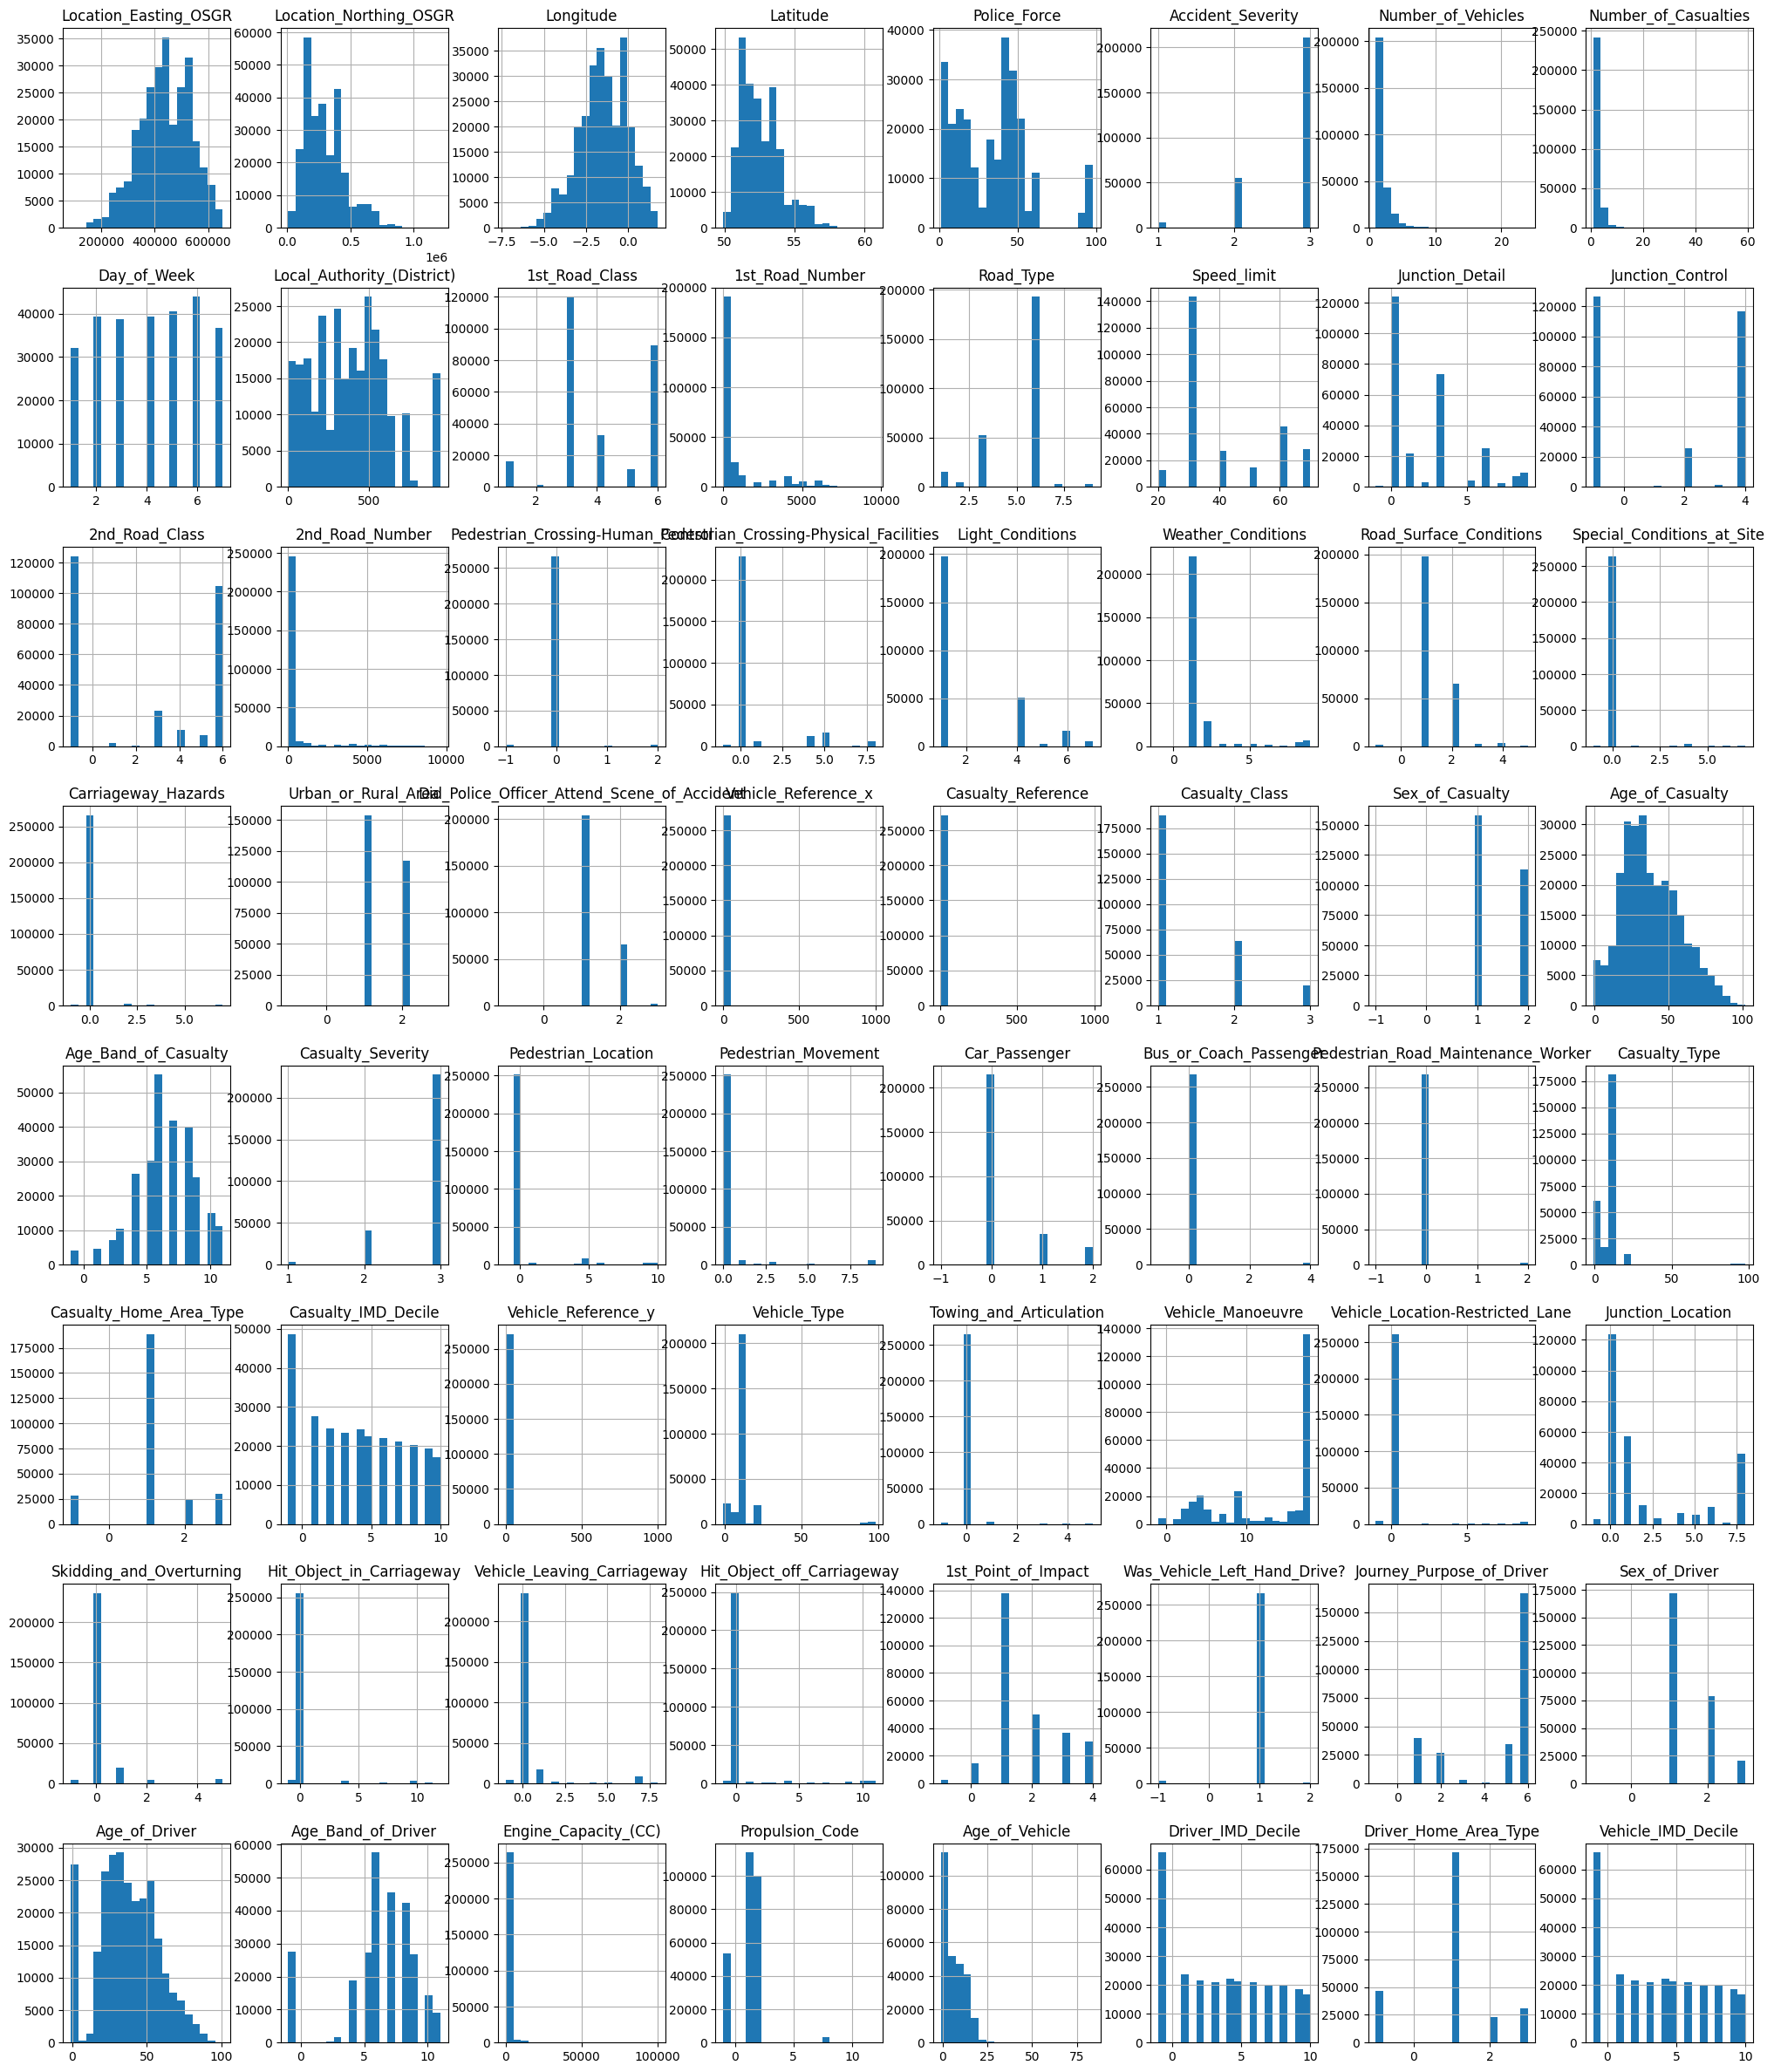

In [13]:
df.hist(bins=20, figsize=(25,30))
plt.show()

In [14]:
#checking full information about combined data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270941 entries, 0 to 270940
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               270941 non-null  object 
 1   Location_Easting_OSGR                        270821 non-null  float64
 2   Location_Northing_OSGR                       270821 non-null  float64
 3   Longitude                                    270821 non-null  float64
 4   Latitude                                     270821 non-null  float64
 5   Police_Force                                 270941 non-null  int64  
 6   Accident_Severity                            270941 non-null  int64  
 7   Number_of_Vehicles                           270941 non-null  int64  
 8   Number_of_Casualties                         270941 non-null  int64  
 9   Date                                         270941 non-nul

In [15]:
#checking all nulls in our data
df.isnull().sum()

Accident_Index              0
Location_Easting_OSGR     120
Location_Northing_OSGR    120
Longitude                 120
Latitude                  120
                         ... 
Propulsion_Code             0
Age_of_Vehicle              0
Driver_IMD_Decile           0
Driver_Home_Area_Type       0
Vehicle_IMD_Decile          0
Length: 69, dtype: int64

In [16]:
#soring columns according to numbers of nulls
df.isnull().sum().sort_values(ascending = False).head(15)

LSOA_of_Accident_Location             15762
Location_Northing_OSGR                  120
Longitude                               120
Latitude                                120
Location_Easting_OSGR                   120
Time                                     34
Accident_Index                            0
Casualty_Home_Area_Type                   0
Vehicle_Manoeuvre                         0
Towing_and_Articulation                   0
Vehicle_Type                              0
Vehicle_Reference_y                       0
Casualty_IMD_Decile                       0
Pedestrian_Road_Maintenance_Worker        0
Casualty_Type                             0
dtype: int64

In [17]:
#dropping LSOA_of_Accident_Location columns as it has many nulls and it is not important
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)

In [18]:
#dropping null cells only in below columns 
df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)

In [19]:
##dropping null cells only in time columns
df.dropna(subset=['Time'],axis=0,inplace=True)

In [20]:
#checking nulls again after our null dropping at all data ... now zero null
df.isnull().values.any()

False

In [21]:
#checking all nulls value in our data
df.isnull().sum()

Accident_Index            0
Location_Easting_OSGR     0
Location_Northing_OSGR    0
Longitude                 0
Latitude                  0
                         ..
Propulsion_Code           0
Age_of_Vehicle            0
Driver_IMD_Decile         0
Driver_Home_Area_Type     0
Vehicle_IMD_Decile        0
Length: 68, dtype: int64

In [22]:
string='25/09/2018'
s1=string[6:10]
s2=string[0:2]
s3=string[3:5]

print('year : ',s1)
print('day : ',s2)
print('month : ',s3)

year :  2018
day :  25
month :  09


In [23]:
def month(string):
    s=string[3:5]
    return s

In [24]:
#25/09/2018
#creating function to add year column
def year(string):
    s=string[6:10]
    return int(s)
df['year']=df['Date'].apply(lambda x: year(x))

In [25]:
#creating function to add month column
def month(string):
    s=string[3:5]
    return int(s)
df['Month']=df['Date'].apply(lambda x: month(x))

In [26]:
#creating function to add day column
def day(string):
    s=string[:2]
    return int(s)
df['Day_of_month']=df['Date'].apply(lambda x: day(x))

In [27]:
#creating function to add hour column
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

In [28]:
#checking data size after adding 4 new columns 
df.shape

(270787, 72)

In [29]:
#checking data after adding 4 new columns 
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,year,Month,Day_of_month,Hour
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,1499,1,-1,8,2,8,2018,9,25,12
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,1999,1,16,-1,-1,-1,2018,9,25,12
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,07/09/2018,...,-1,-1,-1,-1,-1,-1,2018,9,7,11
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,27/09/2018,...,2967,2,1,1,1,1,2018,9,27,8
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,1339,1,8,10,1,10,2018,9,26,19


In [30]:
#checking again data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270787 entries, 0 to 270940
Data columns (total 72 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               270787 non-null  object 
 1   Location_Easting_OSGR                        270787 non-null  float64
 2   Location_Northing_OSGR                       270787 non-null  float64
 3   Longitude                                    270787 non-null  float64
 4   Latitude                                     270787 non-null  float64
 5   Police_Force                                 270787 non-null  int64  
 6   Accident_Severity                            270787 non-null  int64  
 7   Number_of_Vehicles                           270787 non-null  int64  
 8   Number_of_Casualties                         270787 non-null  int64  
 9   Date                                         270787 non-null  ob

In [31]:
#checking label vaules
df['Accident_Severity'].value_counts()

Accident_Severity
3    210795
2     54656
1      5336
Name: count, dtype: int64

In [32]:
#renaming accident severity values
df['Accident_Severity']=df['Accident_Severity'].replace({1:'low' , 2 : 'medium' , 3 :'high'})

In [33]:
#checking label vaules
df['Accident_Severity'].value_counts()

Accident_Severity
high      210795
medium     54656
low         5336
Name: count, dtype: int64

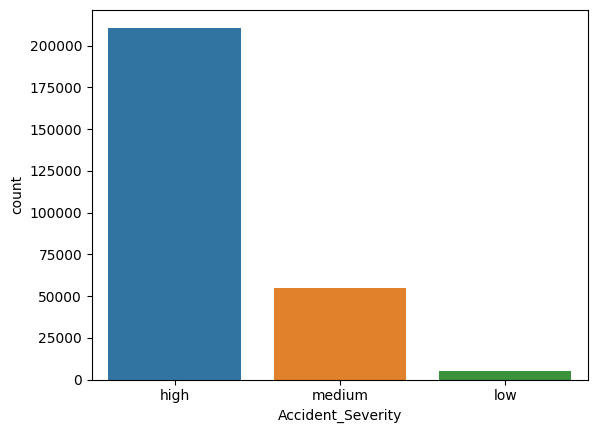

In [34]:
sns.countplot(x = 'Accident_Severity',
              data = df,
              order = df.Accident_Severity.value_counts().index);

In [35]:
#dropping not important columns 
df.drop(['Local_Authority_(Highway)', 'Time', 'Date', 'Accident_Index'],axis=1,inplace=True)

In [36]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270787 entries, 0 to 270940
Data columns (total 68 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        270787 non-null  float64
 1   Location_Northing_OSGR                       270787 non-null  float64
 2   Longitude                                    270787 non-null  float64
 3   Latitude                                     270787 non-null  float64
 4   Police_Force                                 270787 non-null  int64  
 5   Accident_Severity                            270787 non-null  object 
 6   Number_of_Vehicles                           270787 non-null  int64  
 7   Number_of_Casualties                         270787 non-null  int64  
 8   Day_of_Week                                  270787 non-null  int64  
 9   Local_Authority_(District)                   270787 non-null  in

In [37]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Reference_x', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casu

# Using DNN network

In [38]:
data_copy=df.copy()

In [39]:
data_copy.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,year,Month,Day_of_month,Hour
0,534140.0,168370.0,-0.073120,51.398512,1,high,2,1,3,20,...,1499,1,-1,8,2,8,2018,9,25,12
1,534140.0,168370.0,-0.073120,51.398512,1,high,2,1,3,20,...,1999,1,16,-1,-1,-1,2018,9,25,12
2,535780.0,185300.0,-0.043058,51.550261,1,high,1,1,6,4,...,-1,-1,-1,-1,-1,-1,2018,9,7,11
3,534120.0,192440.0,-0.064263,51.614820,1,high,1,1,5,32,...,2967,2,1,1,1,1,2018,9,27,8
4,529080.0,162590.0,-0.147913,51.347739,1,high,2,2,4,21,...,1339,1,8,10,1,10,2018,9,26,19


In [40]:
#checking accident severity values
data_copy['Accident_Severity'].value_counts()

Accident_Severity
high      210795
medium     54656
low         5336
Name: count, dtype: int64

In [41]:
#checking null vales again
data_copy.isnull().values.any()

False

In [42]:
#splitting data to input and output
X=data_copy.drop('Accident_Severity',axis=1) #input
y=data_copy['Accident_Severity']  #output(label)

In [43]:
print(X.shape)
print(y.shape)

(270787, 67)
(270787,)


In [44]:
y 

0           high
1           high
2           high
3           high
4           high
           ...  
270936      high
270937      high
270938      high
270939    medium
270940      high
Name: Accident_Severity, Length: 270787, dtype: object

In [45]:
y = pd.get_dummies(y).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (270787, 3)


In [46]:
y 

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [ True, False, False],
       [False, False,  True],
       [ True, False, False]])

In [47]:
#using standerscaler technique to scale all input data to be with the same scale
from sklearn.preprocessing import StandardScaler # importing module 
scaler = StandardScaler()   #making function
X=scaler.fit_transform(X)    #scalling input data

In [48]:
X

array([[ 0.99211723, -0.83392156,  0.97355596, ...,  0.62252852,
         1.05845226, -0.32867509],
       [ 0.99211723, -0.83392156,  0.97355596, ...,  0.62252852,
         1.05845226, -0.32867509],
       [ 1.00905246, -0.72616129,  0.99470638, ...,  0.62252852,
        -1.00082735, -0.52911367],
       ...,
       [-1.22601579,  1.75118552, -1.27166756, ...,  1.49555472,
         0.48643015,  0.87395638],
       [-1.23096212,  1.70294482, -1.27542668, ...,  1.49555472,
         0.94404784, -0.52911367],
       [-1.26039224,  1.71465014, -1.30713543, ...,  1.49555472,
         1.7448788 , -1.33086799]])

In [49]:
#splitting all data to train data and test data 
from sklearn.model_selection import train_test_split   # importing module 
#data splitting with 80% train and 20% test and shuffle it
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,shuffle=True)  

In [50]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (216629, 67)
 y_train.shape :  (216629, 3)
 X_test.shape :  (54158, 67)
 y_test.shape :  (54158, 3)


In [51]:
#classification

In [52]:
model = Sequential()
model.add(Dense(512, input_dim=67, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        34,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,915 (652.01 KB)

 Trainable params: 166,915 (652.01 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history=model.fit(X_train, y_train, epochs=10, verbose=1,validation_split=0.15)

Epoch 1/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9234 - loss: 0.2410 - val_accuracy: 0.9397 - val_loss: 0.1787
Epoch 2/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9368 - loss: 0.1861 - val_accuracy: 0.9402 - val_loss: 0.1749
Epoch 3/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9384 - loss: 0.1852 - val_accuracy: 0.9415 - val_loss: 0.1773
Epoch 4/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9390 - loss: 0.1783 - val_accuracy: 0.9421 - val_loss: 0.1679
Epoch 5/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9414 - loss: 0.1720 - val_accuracy: 0.9425 - val_loss: 0.1668
Epoch 6/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9412 - loss: 0.1714 - val_accuracy: 0.9435 - val_loss: 0.1660
Epoch 7/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9431 - loss: 0.1672 - val_accuracy: 0.9449 - val_loss: 0.1626
Epoch 8/10
5755/5755 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9433 - loss: 0

In [54]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(100)

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['low' , 'medium' , 'high']
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

#Y_pred = np.where(Y_pred>0.5, 1, 0) #for 2 classes only
print('Confusion Matrix')
cm = confusion_matrix(y_test, Y_pred)
print(cm)
print('Classification Report')
print(classification_report(y_test, Y_pred))

1693/1693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Confusion Matrix
[[42134     0    30]
 [  181   726   184]
 [ 2517    21  8365]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42164
           1       0.97      0.67      0.79      1091
           2       0.98      0.77      0.86     10903

    accuracy                           0.95     54158
   macro avg       0.96      0.81      0.87     54158
weighted avg       0.95      0.95      0.94     54158



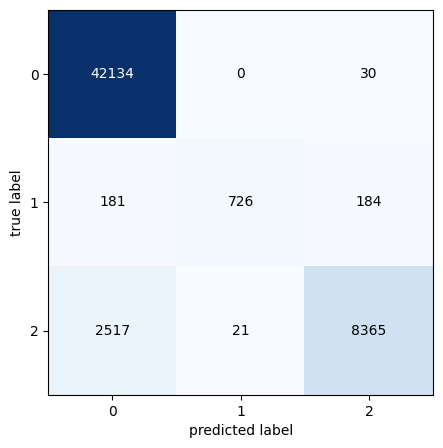

In [56]:
# pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [57]:
#regression  why linear predicting a continuous numerical value

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_predicted = model.predict(X_test)

predicted_value = model.predict(X_train)
print("Predicted value for new data:", predicted_value[0])


Predicted value for new data: [ 1.0319158  -0.00607205 -0.02584684]


In [59]:
#clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [2 2 1 ... 2 1 1]


/tmp/ipykernel_18/1776088686.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')


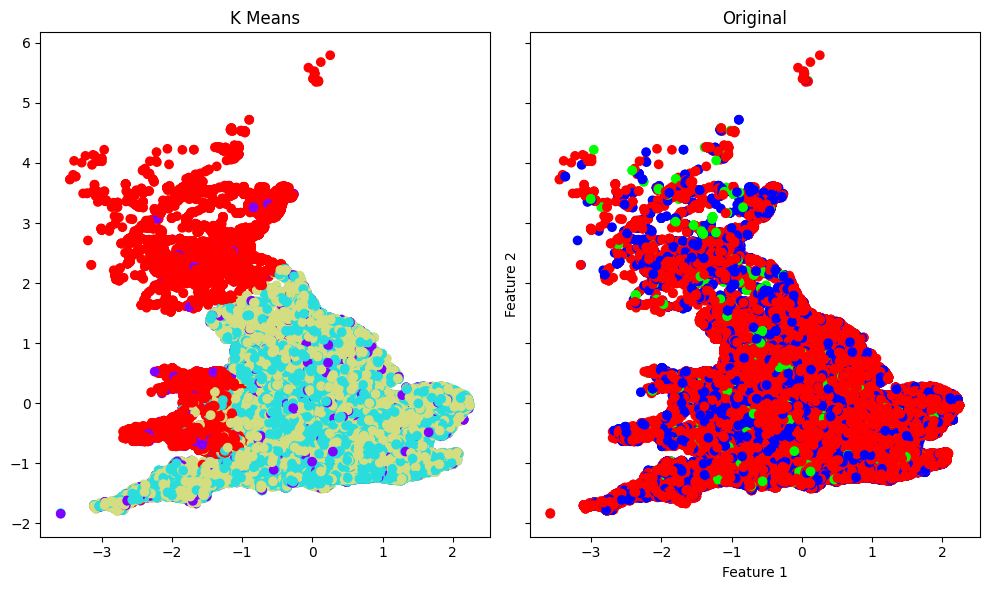

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# (Optional) Get cluster centroids
centroids = kmeans.cluster_centers_

# Print cluster labels
print("Cluster labels:", cluster_labels)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# Plot KMeans clusters
ax1.set_title('K Means')
ax1.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='rainbow')  # Use features directly

# Plot original data points with labels (if available)
ax2.set_title('Original')
if y_train is not None:  # Check if labels exist
    ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
else:
    ax2.scatter(X_train[:, 0], X_train[:, 1], c='gray')  # Use gray for unlabeled data
    ax2.text(0.5, 0.5, 'No labels provided', ha='center', va='center')

# Customize plot (optional)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()
